## Homework 2

In [210]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    "text.latex.preamble": r'\usepackage{amsfonts}'}
)



### 1(a)
According to SVD of A:
$$ A = [U_1, U_2]\begin{bmatrix}\Sigma & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix} \begin{bmatrix}V_1^T \\ V_2^T\end{bmatrix}$$
The rank of A is equal to the rank of $\Sigma$, which is a square matrix of rank $r$. 
The null space of A is the span of $V_2^T$, and $dim(V_2^T) = n-r$. So $rank(A) + dim(null(A)) = r + n-r = n$  $$\tag*{$\blacksquare$}$$


### 1(b) 
Similarly, the SVD of $A^T$ is:
$$ A^T = [V_1, V_2]\begin{bmatrix}\Sigma & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix} \begin{bmatrix}U_1^T \\ U_2^T\end{bmatrix}$$
The range of $A^T$ is then the span of $V_1$, which is also the perp of null space of $A$. That verifies $range(A^T) = null(A)^{\perp}$ $$\tag*{$\blacksquare$}$$

### 1(c)
The SVD of $AA^T$ is:
$$ AA^T = U\Sigma V^TV\Sigma U^T = U\Sigma^2U^T = [U_1, U_2]\begin{bmatrix}\Sigma^2 & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix} [U_1^T, U_2^T]^T$$
We can see that the range of $AA^T$ is still the span of singular vectors in $U_1$, that is equal to the range of $A$. $$\tag*{$\blacksquare$}$$

### 1(d)
The SVD of $A^TA$ is:
$$ A^TA = V\Sigma U^TU\Sigma V^T = V\Sigma^2V^T = [V_1, V_2]\begin{bmatrix}\Sigma^2 & \mathbf{0} \\ \mathbf{0} & \mathbf{0} \end{bmatrix} [V_1^T, V_2^T]^T$$
We can see that the null space of $A^TA$ is the span of $V_2$, which is the same as $null(A)$ $$\tag*{$\blacksquare$}$$

## 2

In [218]:
# Definition of plot_ellipse
def plot_ellipse(A):
    orange = "#f28e24"
    red = "#eb4034"
    
    t = np.linspace(0, 2*np.pi, 200)
    z = np.vstack((np.cos(t), np.sin(t)))
    u, s, vt = np.linalg.svd(A)
    x = vt.T @ np.linalg.inv(np.diag(s)) @ z
    plt.figure(figsize=(8,8))
    # Plot the ellipse
    plt.fill(x[0], x[1])
    
    print(s)
    # semi-major axis (v2 divided by smaller singular value)
    plt.plot([0,vt[1,0]/s[1]],[0,vt[1,1]/s[1]],color=red,label='major axis')
    # semi-minor axis (v1 divided by larger singular value)
    plt.plot([0,vt[0,0]/s[0]],[0,vt[0,1]/s[0]],color=orange,label='minor axis')

    plt.title("$\{x\in \mathbb{R}^2\mid||Ax||\leq 1\}$")
    plt.axis('equal')
    plt.legend()
    plt.show()

[5.11667274 1.95439508]


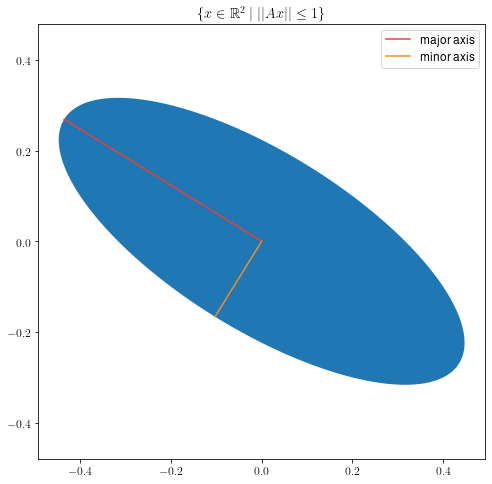

In [219]:
# Call the plot_ellipse function
A = np.array([[3,2],[1,4]])
plot_ellipse(A)

In [216]:
# This one is plotting the control problem
def plot_ellipse_control(A):
    orange = "#f28e24"
    red = "#eb4034"
    t = np.linspace(0, 2*np.pi, 200)
    z = np.vstack((np.cos(t), np.sin(t)))
    u, s, vt = np.linalg.svd(A)
    x = u @ np.diag(s) @ z
    plt.figure(figsize=(8,8))
    
    # Plot the ellipse
    plt.fill(x[0], x[1])
    
    print(u)
    # semi-major axis (u1 multiplied by larger singular value)
    plt.plot([0,u[0,0]*s[0]],[0,u[0,1]*s[0]],color=red,label='major axis')
    # semi-minor axis (u2 multiplied by smaller singular value)
    plt.plot([0,u[1,0]*s[1]],[0,u[1,1]*s[1]],color=orange,label='minor axis')
    plt.title("$\{Ax\in \mathbb{R}^2\mid||x||\leq 1\}$")
    plt.axis('equal')
    plt.legend()
    plt.show()

[[-0.64074744 -0.76775173]
 [-0.76775173  0.64074744]]


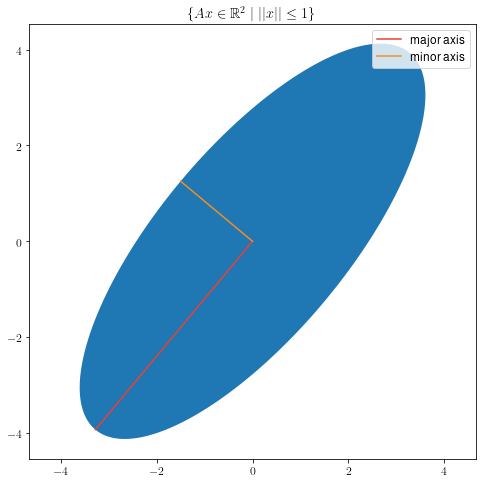

In [217]:
plot_ellipse_control(A)

### 3(a)
The $i^{th}$ diagonal element of $A^TA$ can be written as:
$$(A^TA)_{ii} = \sum^{n}_{j=1}A^T_{ij}A_{ji} = \sum^n_{j=1}|A_{ji}|^2$$ 
By the definition of trace we have:
$$trace(A^TA) = \sum^{n}_{i=1}\sum^n_{j=1}|A_{ji}|^2 = \sum_{i,j}|A_{ij}|^2$$
$$||A||_F = \sqrt{trace(A^TA)} = \left(\sum_{i,j}|A_{ij}|^2\right)^{1/2}$$
$$\tag*{$\blacksquare$}$$


### 3(b)
$$||UA||_F = \sqrt{trace((UA)^T(UA))} = \sqrt{trace(A^T(U^TU)A)} = \sqrt{trace(A^TA)} = ||A||_F$$
$$||AV||_F = \sqrt{trace((AV)^T(AV))} = \sqrt{trace((AV)(AV)^T)} = \sqrt{trace(A(VV^T)A^T)} = \sqrt{trace(AA^T)} = \sqrt{trace(A^TA)} = ||A||_F$$
$$\tag*{$\blacksquare$}$$

### 3(c)
The SVD of A is $A = U\Sigma V^T$. Because both $U$ and $V$ are orthogonal matrices, they don't change the Frobenius norm as prooved in 3(b). 
Thus we have $||A||_F = ||U\Sigma V^T||_F = ||\Sigma||_F = \sqrt{\sum_{i=1}^r\sigma_i^2}$
  
Suppose $\sigma_{max} = \sigma_1$ for matrix $A$ and all singular values are non-negative. We have:
$$||A||_F = \sqrt{\sum_{i=1}^r\sigma_i^2} \geq \sqrt{\sigma_1^2} = \sigma_1$$
$$||A||_F = \sqrt{\sum_{i=1}^r\sigma_i^2} \leq \sqrt{\sum_{i=1}^r\sigma_1^2} = \sqrt{r\sigma_1^2} = \sqrt{r}\sigma_1$$

By definition of spectral norm, $||A|| = \sigma_1$. Thus we have $||Ax|| \leq ||A||||x|| = \sigma_1||x|| \leq ||A||_F||x||

In [229]:
B = np.array([[1,2],[3,4]])
print(np.sqrt(np.trace(B.T@B)))
u,s,vh = np.linalg.svd(B)
print(s)
print(np.sqrt(s[0]**2+s[1]**2))
print(np.linalg.norm(B))

5.477225575051661
[5.4649857  0.36596619]
5.477225575051661
5.477225575051661
